#Data Wrangling a Long Term Care Facilities Dataset by Dr Alvin Ang

https://www.alvinang.sg/s/number-of-residential-long-term-care-facilities-sector-breakdown.csv



---



#Step 1: Import Dataset

In [1]:
import pandas as pd

LTC = pd.read_csv('https://www.alvinang.sg/s/number-of-residential-long-term-care-facilities-sector-breakdown.csv')
LTC.head()

,year,type,sector,count
0,2006,Nursing Homes,Public,0
1,2006,Nursing Homes,Not-For-Profit,31
2,2006,Nursing Homes,Private,31
3,2006,Inpatient Hospices,Public,0
4,2006,Inpatient Hospices,Not-For-Profit,2




---



#Step 2: Groupby Sector

##2a. Using Groupby

In [3]:
LTC_sector = LTC.groupby(['year','sector']).sum()

LTC_sector

count
year sector               
2006 Not-For-Profit     33
     Private            31
     Public              0
2007 Not-For-Profit     33
     Private            31
     Public              0
2008 Not-For-Profit     32
     Private            33
     Public              0
2009 Not-For-Profit     32
     Private            30
     Public              0
2010 Not-For-Profit     32
     Private            32
     Public              0
2011 Not-For-Profit     33
     Private            32
     Public              1
2012 Not-For-Profit     33
     Private            32
     Public              1
2013 Not-For-Profit     30
     Private            33
     Public              5
2014 Not-For-Profit     29
     Private            32
     Public              6
2015 Not-For-Profit     28
     Private            34
     Public             11
2016 Not-For-Profit     28
     Private            30
     Public             13
2017 Not-For-Profit     25
     Private            30
     Public             20
2018 Not-For-Profit     25
     Private            28
     Public             21
2019 Not-For-Profit     25
     Private            31
     Public             23

##2b. Using Pivot Table

In [5]:
LTC.pivot_table(index=['year','sector'],values='count',aggfunc='sum')

count
year sector               
2006 Not-For-Profit     33
     Private            31
     Public              0
2007 Not-For-Profit     33
     Private            31
     Public              0
2008 Not-For-Profit     32
     Private            33
     Public              0
2009 Not-For-Profit     32
     Private            30
     Public              0
2010 Not-For-Profit     32
     Private            32
     Public              0
2011 Not-For-Profit     33
     Private            32
     Public              1
2012 Not-For-Profit     33
     Private            32
     Public              1
2013 Not-For-Profit     30
     Private            33
     Public              5
2014 Not-For-Profit     29
     Private            32
     Public              6
2015 Not-For-Profit     28
     Private            34
     Public             11
2016 Not-For-Profit     28
     Private            30
     Public             13
2017 Not-For-Profit     25
     Private            30
     Public             20
2018 Not-For-Profit     25
     Private            28
     Public             21
2019 Not-For-Profit     25
     Private            31
     Public             23



---



#Step 3: Total Sum for Each Sector

In [4]:
LTC.pivot(columns='sector',values='count').sum()

sector
Not-For-Profit    418.0
Private           439.0
Public            101.0
dtype: float64



---



#Step 4: Horizontal Bar Plot for the Long Term Care Data
- Create a horizontal bar plot of the total long
term care facilities by the sector


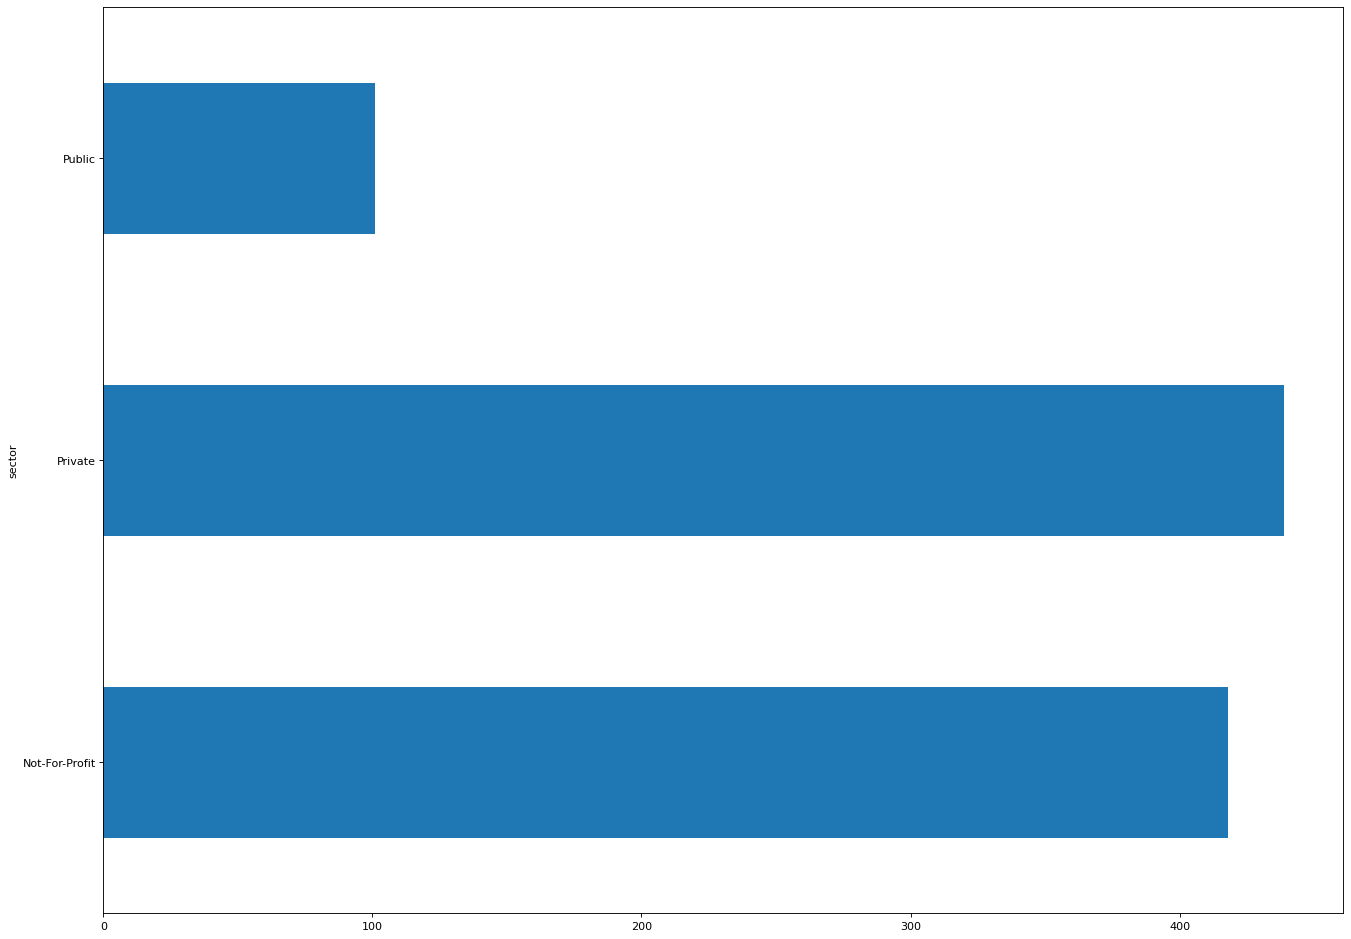

In [12]:
from matplotlib.pyplot import figure

figure(figsize=(20, 15), dpi=80)

LTC.pivot(columns='sector',values='count').sum().plot.barh()

# sector
# Not-For-Profit    418.0
# Private           439.0
# Public            101.0



---



#Step 5: Line Plot Number of Facilities vs Year

Text(0, 0.5, 'No of long term care faciliteis')

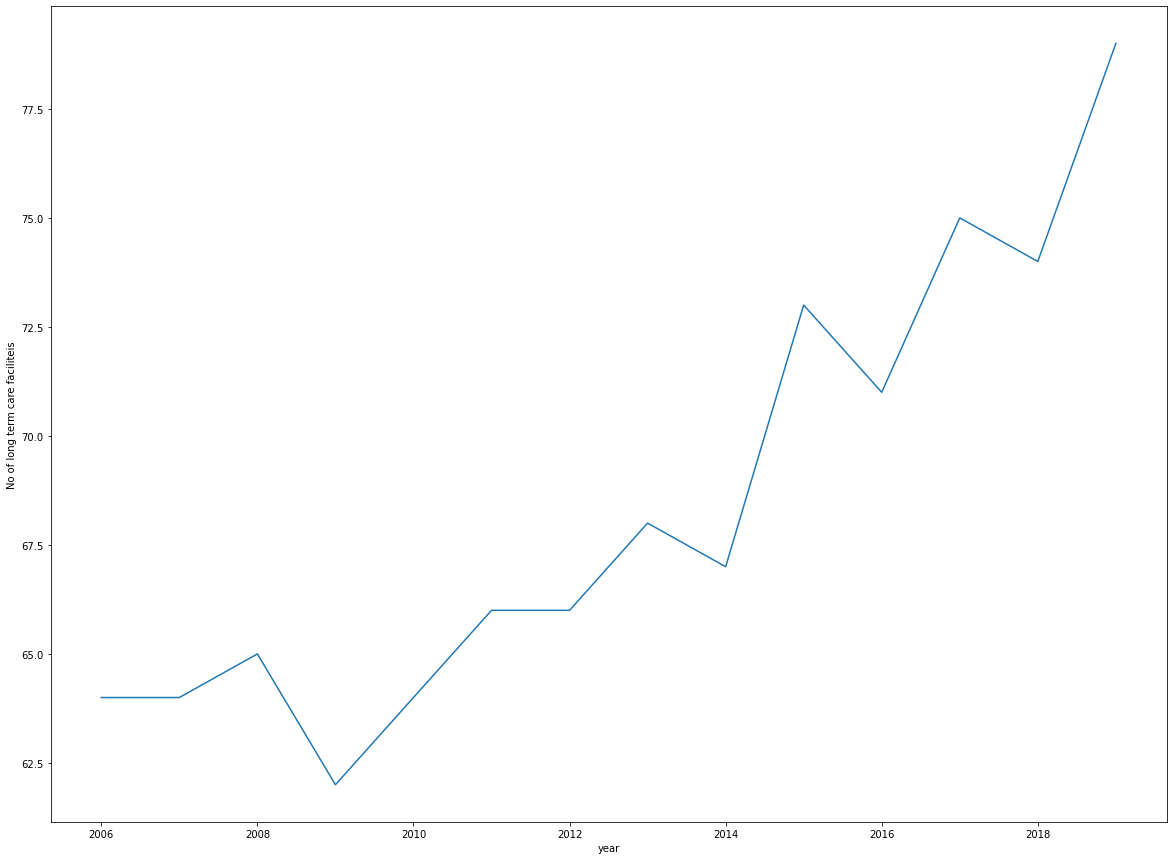

In [19]:
import matplotlib.pyplot as plt

LTC_pivot = LTC.pivot(columns='year',values='count').sum()
LTC_pivot.plot(figsize = (20, 15))
plt.xlabel('year')
plt.ylabel('No of long term care faciliteis')



---



#Step 6: Using Pipe to Filter Out Nursing Homes > 2010

##6a. Load Data

In [20]:
def load_data():
    return pd.read_csv('https://www.alvinang.sg/s/number-of-residential-long-term-care-facilities-sector-breakdown.csv')

df = load_data()    

In [21]:
df.head()

,year,type,sector,count
0,2006,Nursing Homes,Public,0
1,2006,Nursing Homes,Not-For-Profit,31
2,2006,Nursing Homes,Private,31
3,2006,Inpatient Hospices,Public,0
4,2006,Inpatient Hospices,Not-For-Profit,2




---



##6b. Filter Out Only 'Nursing Homes'

- df[df['type'] == 'Nursing Homes']

In [22]:
#Create a Nursing Homes Filter Function

def nursinghomes(df):
    df_nursinghomes = df[df['type'] == 'Nursing Homes']

    return df_nursinghomes

In [23]:
nursinghome_pipe =(
    load_data()
    .pipe(nursinghomes)
)

nursinghome_pipe

#pipe with only 1 funtion --> Nursing Homes Filter

,year,type,sector,count
0,2006,Nursing Homes,Public,0
1,2006,Nursing Homes,Not-For-Profit,31
2,2006,Nursing Homes,Private,31
6,2007,Nursing Homes,Public,0
7,2007,Nursing Homes,Not-For-Profit,31
8,2007,Nursing Homes,Private,31
12,2008,Nursing Homes,Public,0
13,2008,Nursing Homes,Not-For-Profit,30
14,2008,Nursing Homes,Private,33
18,2009,Nursing Homes,Public,0




---



##6c. Filter Out > 2010
- df[df['year'] > 2010]

In [24]:
#Create a Function to Filter Out > 2010

def above2010(df):
    df_above2010 = df[df['year'] > 2010]

    return df_above2010

In [25]:
nursinghome_pipe =(
    load_data()
    .pipe(nursinghomes)
    .pipe(above2010)
)

nursinghome_pipe

#pipe with 2 functions --> Nursing Homes above 2010

,year,type,sector,count
30,2011,Nursing Homes,Public,1
31,2011,Nursing Homes,Not-For-Profit,31
32,2011,Nursing Homes,Private,32
36,2012,Nursing Homes,Public,1
37,2012,Nursing Homes,Not-For-Profit,31
38,2012,Nursing Homes,Private,32
42,2013,Nursing Homes,Public,5
43,2013,Nursing Homes,Not-For-Profit,28
44,2013,Nursing Homes,Private,33
48,2014,Nursing Homes,Public,6




---



#THE END



---

